In [4]:
!pip install keras_core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 6.3 MB/s eta 0:00:00


In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import os
import time
import copy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

os.environ["KERAS_BACKEND"] = "torch"
import keras_core as keras

Using PyTorch backend.


# The Perceptron and beyond

In this section, we consider a regression task where the underlying data generation process is as follows:
$$ y = - \sin{(0.8 * x)}$$

Note that in this example there is no noise in the data, a case that you will rarely encounter in practice.

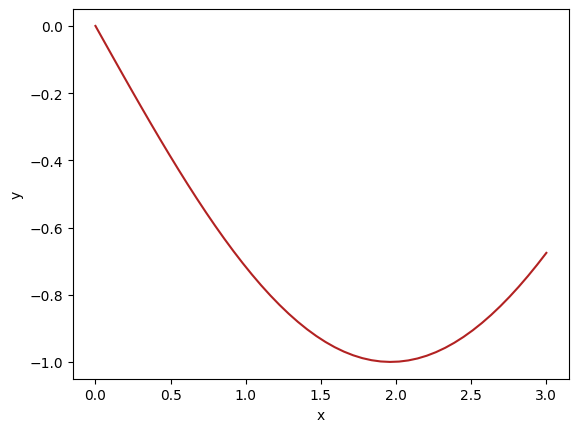

In [6]:
# Defining our dataset

x_train = torch.linspace(0, 3, 50)
y_train = - torch.sin(0.8*x_train)

# Plotting the dataset

plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_train, y_train, color= "firebrick")
plt.show()

The following function can be used to instantiate the perceptron

In [7]:
def perceptron(input_shape= [1], units= 1, activation= None):
    model = keras.Sequential(
        [
            keras.layers.Input(shape= input_shape),
            keras.layers.Dense(units= units, activation= activation)
        ]
    )
    return model

# You can vizualize a summary of your model by commenting out the following line.
# Here it is an affine function in dimension 1, thus having two parameters.

# linear_model.summary()

To fit a model in keras, one must first compile it, that is specify the loss and optimizer. Here they are respectively chosen as the mean squared error and gradient descent. Observe that the batch size is the same as the size of the training dataset, resulting in batch gradient descent.

You can play with the learning rate and number of epochs to understand how the training algorithm behaves.

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9260
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2197
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5661
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3138
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2146
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1738
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1554
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1457
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1394
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1345
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1302
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1262
Epoch 13/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1225
Epoch 14/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1190
Epoch 15/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1156
Epoch 16/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

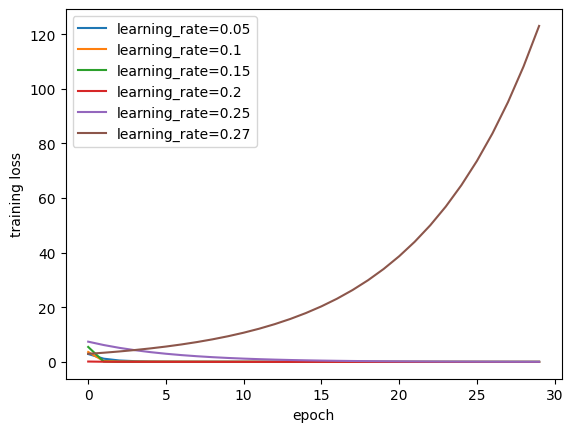

In [ ]:
history_dict = {}
learning_rates_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.27]
min_loss = np.inf  # Set an initial high value
best_lr = None
best_model = None

for lr in learning_rates_list:
  linear_model = perceptron()
  linear_model.compile(
      loss = keras.losses.MeanSquaredError(),
      optimizer = keras.optimizers.SGD(learning_rate= lr) #0.2
  )
  history = linear_model.fit(x_train, y_train, epochs= 30, batch_size= 50)

  final_loss = history.history['loss'][-1]  # Final loss value after training
  history_dict[str(lr)] = history.history['loss']
  if final_loss < min_loss:
    min_loss = final_loss
    best_lr = lr
    best_model = linear_model



plt.figure()
plt.xlabel('epoch')
plt.ylabel('training loss')

for lr in learning_rates_list:
  loss = history_dict[str(lr)]
  plt.plot(loss, label=f'learning_rate={lr}')

plt.legend(loc='best')
plt.show()

Having trained the model, we can now use it in prediction.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


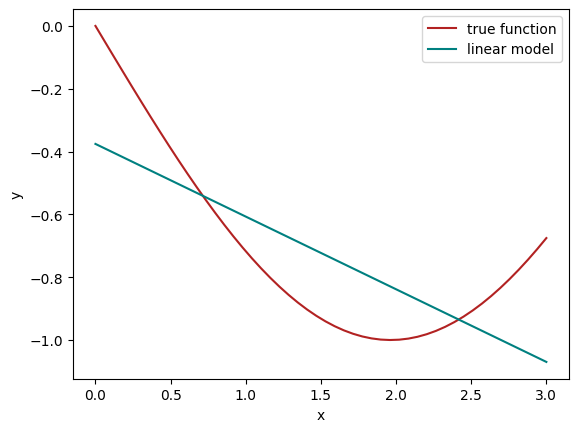

In [27]:
y_pred_linear = best_model.predict(x_train)

plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_train, y_train, color='firebrick', label= 'true function')
plt.plot(x_train, y_pred_linear, color= 'teal', label= 'linear model')
plt.legend()
plt.show()

*Beyond* this simple perceptron, we now consider a 2-layers neural network model.

In [28]:
def neural_net_2layers(input_shape= [1], units= 16, activation= 'sigmoid'):
    model = keras.Sequential(
        [
            keras.layers.Input(shape= input_shape),
            keras.layers.Dense(units= units, activation= activation),
            keras.layers.Dense(units= 1)
        ]
    )
    return model

net = neural_net_2layers(units= 10)

net.compile(
    loss = keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.Adam(learning_rate= 0.1)
)

You can train the model, and play with the hyperparameters to answer the questions.

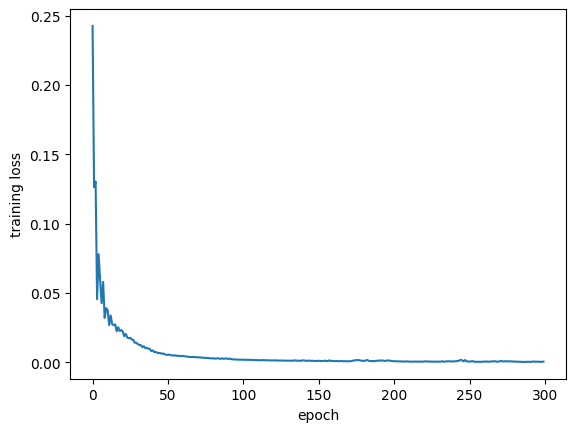

In [29]:
history = net.fit(x_train, y_train, epochs= 300, batch_size= 25, verbose= 0)

plt.figure()
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.plot(history.history['loss'])
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


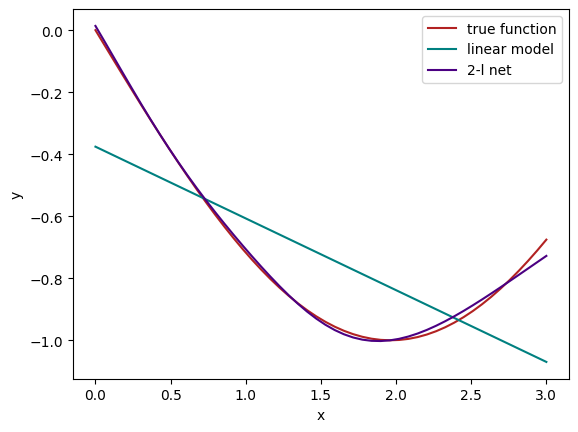

In [30]:
y_pred_2l = net.predict(x_train)

plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_train, y_train, color='firebrick', label = 'true function')
plt.plot(x_train, y_pred_linear, color= 'teal', label = 'linear model')
plt.plot(x_train, y_pred_2l, color= 'indigo', label = '2-l net')
plt.legend()
plt.show()

# In the wild jungle of training algorithms

## Small model

We first start by defining a simple dataset based on a modified cosine surface. This will allows us to test small models, and in particular 2nd order optimization algorithms. While <tt>keras</tt> is high-level deep learning library, we will dive into the depths of <tt>pytorch</tt> to have more control over the optimization schemes.

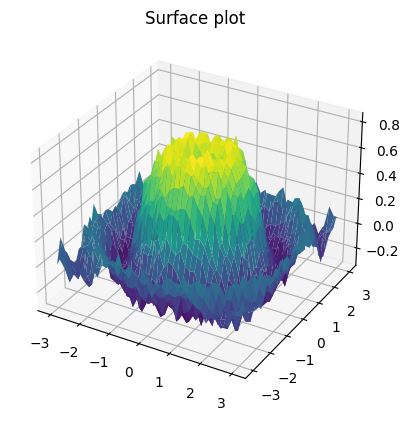

In [31]:
def f(x, y):
    return(torch.sin(0.8*(x**2 + y**2)) / (x**2 + y**2)**(0.9))

noise = 0.05
mesh_size = 40
t = torch.linspace(-3, 3, mesh_size)
x, y = torch.meshgrid(t, t)
z = f(x, y) + noise * torch.randn(mesh_size, mesh_size)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()


# dataset creation
x_train = torch.vstack([x.ravel(), y.ravel()]).T
y_train = z.ravel()

Complete the following class that encodes the architecture of a neural network with two hidden layers, for when the input data is 2-dimensional. We provide a simplified <tt>fit</tt> method to train the neural network. 

In [32]:
class Net3L(nn.Module):

    def __init__(self, n_neurons_l1= 10, n_neurons_l2= 10):
        super(Net3L, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, n_neurons_l1),
            nn.ReLU(),
            nn.Linear(n_neurons_l1, n_neurons_l2),
            nn.ReLU(),
            nn.Linear(n_neurons_l2, 1)
        )

    def forward(self, x):
        return self.linear_relu_stack(x)

    def fit(self, x_train, y_train, optimizer, batch_size, n_epochs_max):
        # Instantiate the train loader
        train_data = TensorDataset(x_train, y_train)
        train_loader = DataLoader(dataset =train_data, batch_size= batch_size, shuffle= True)
        # Beginning the optimization algorithm
        loss_list = []
        for n_epochs in range(n_epochs_max):
            # We train for a fixed number of epochs
            for x_batch, y_batch in train_loader:
                def closure():
                    optimizer.zero_grad()
                    output = self.forward(x_batch)
                    loss = nn.MSELoss()(output.squeeze(-1), y_batch)
                    loss.backward()
                    return loss
                loss = optimizer.step(closure)
            loss_list.append(loss.item())
        return loss_list


The cell below gives an example of what happens when the training is done using the L-BFGS algorithm. It can be adapted to other algorithms by modifying the arguments passed to the <tt>fit</tt> method.

> Bloc en retrait



In [8]:
net = Net3L(50, 50)
loss_list = net.fit(x_train, y_train, optimizer=torch.optim.LBFGS(net.parameters(), lr=1, max_iter=1, line_search_fn='strong_wolfe'), batch_size=1000, n_epochs_max=2000)

plt.figure()
plt.xlabel('Epoch number')
plt.ylabel('Training MSE')
plt.plot(loss_list)
plt.show()

y_pred = net(x_train)

fig, ax = plt.subplots(1, 2, figsize=(10, 10), subplot_kw={'projection': '3d'})
#
ax[0].plot_trisurf(x_train[:, 0], x_train[:, 1], y_pred.detach().numpy().squeeze(-1), vmin=y_train.min(), cmap=cm.viridis)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_zlabel('z')
ax[0].set_title('Surface')
#
ax[1].plot_trisurf(x_train[:, 0], x_train[:, 1], (y_pred.detach().squeeze(-1)-y_train)**2, vmin=0, cmap=cm.viridis)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_zlabel('z')
ax[1].set_title('Squared residuals')
plt.show()

print('Training error:', (nn.MSELoss()(y_pred.squeeze(-1), y_train)).item())

NameError: ignored

In [34]:
# Example with a list of optimizers
net = Net3L(50, 50)
# We create copies of this net so that every optimizer starts with the same initialization.
net_list = [copy.deepcopy(net) for i in range(5)]
# The number of epochs and other hyperparameters can (and should) be adapted to the point you're trying to make.
n_epochs = 2500
optimizer_list = [
    torch.optim.SGD(params=net_list[0].parameters(), lr=0.05),
    torch.optim.SGD(params=net_list[1].parameters(), lr=0.1),
    torch.optim.SGD(params=net_list[2].parameters(), lr=0.1, momentum=0.9, nesterov= True),
    torch.optim.Adam(params=net_list[3].parameters()),
    torch.optim.LBFGS(params=net_list[4].parameters(), lr=1, max_iter=1, line_search_fn='strong_wolfe')]
batch_sizes_list = [1600, 40, 400, 400, 1600]
times_list = []
loss_meta_list = []

for i, optimizer in enumerate(optimizer_list):
    t0 = time.time()
    loss_list = net_list[i].fit(x_train, y_train, optimizer= optimizer, batch_size= batch_sizes_list[i], n_epochs_max= n_epochs)
    t1 = time.time()
    times_list.append(t1-t0)
    loss_meta_list.append(loss_list)


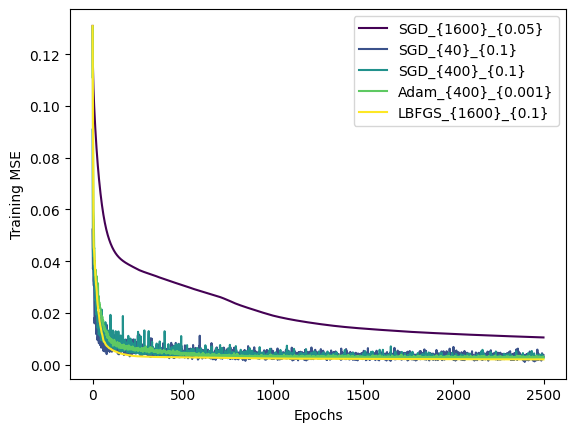

Respective times: [56.14115381240845, 136.87532687187195, 55.18404793739319, 56.681400775909424, 73.75763607025146]


In [35]:
colors = cm.viridis(torch.linspace(0, 1, 5))
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training MSE')
label_list = ["SGD_{1600}_{0.05}", "SGD_{40}_{0.1}", "SGD_{400}_{0.1}", "Adam_{400}_{0.001}", "LBFGS_{1600}_{0.1}"]
for i in range(5):
    plt.plot(loss_meta_list[i], color= colors[i], label=label_list[i])
plt.legend(loc='best')
# plt.title("Training loss MSE comparison (label of the curves = METHOD_{batch_size}_{learning_rate}")
plt.show()

#
print('Respective times:',times_list)

## Towards a bigger model

We now switch to a bigger model, used to perform classification over the MNIST dataset. This example is widely known in the machine learning community, and we follow the code in the footsteps of François Chollet, the creator of the <tt>keras</tt> library (https://keras.io/examples/vision/mnist_convnet/).

In [36]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [37]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)


The following cell deals with the training of the model. Can you change the optimizer while still retaining the capabilities of the model trained with adam ?

In [38]:
batch_size = 128
epochs = 15

# Modify the optimizer here
model.compile(loss="categorical_crossentropy", optimizer="adadelta", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 86ms/step - accuracy: 0.1162 - loss: 2.3153 - val_accuracy: 0.1583 - val_loss: 2.3020
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 35s 82ms/step - accuracy: 0.1216 - loss: 2.3027 - val_accuracy: 0.1865 - val_loss: 2.2884
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 85ms/step - accuracy: 0.1352 - loss: 2.2903 - val_accuracy: 0.2078 - val_loss: 2.2749
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 87ms/step - accuracy: 0.1488 - loss: 2.2761 - val_accuracy: 0.2283 - val_loss: 2.2614
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 35s 82ms/step - accuracy: 0.1630 - loss: 2.2632 - val_accuracy: 0.2455 - val_loss: 2.2477
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 85ms/step - accuracy: 0.1807 - loss: 2.2500 - val_accuracy: 0.2642 - val_loss: 2.2334
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 84ms/step - accuracy: 0.1991 - loss: 2.2364 - val_accuracy: 0.2903 - val_loss: 2.2187
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 35s 82ms/step - accuracy: 0.2151 - loss: 2.2241 - 

In [39]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 2.065199851989746
Test accuracy: 0.5986999869346619


# A personal regression example

For this exercise, you will work on a dataset that is built from your personal student number as indicated in the assignment.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
data = pd.read_csv("/content/drive/My Drive/ML/session1/data.csv", header= None).values.T

def dataset_generation(d1, d2, d3, d4, d5):
    T_new = (d1 * data[:, 2] + d2 * data[:, 3] + d3 * data[:, 4] + d4 * data[:, 5] + d5 * data[:, 6])/(d1 + d2 + d3 + d4 + d5)
    return T_new

x_values = data[:, 0:2]

# Put your own (decreasingly ordered) student number in the function

T_new =  dataset_generation(9, 7, 7, 5, 4)

# Random subsampling to get the working dataset
idx = np.random.permutation(13600)

# training set
x_train = x_values[idx[0:2000]]
y_train = T_new[idx[0:2000]]

# test set
x_test = x_values[idx[2000:3000]]
y_test = T_new[idx[2000:3000]]


print('Number of training datapoints:', x_train.shape[0])
print('Number of testing datapoints:', x_test.shape[0])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of training datapoints: 2000
Number of testing datapoints: 1000


You can now plot the surface of the dataset. (Hint: use the function <tt> plot_trisurf </tt>)

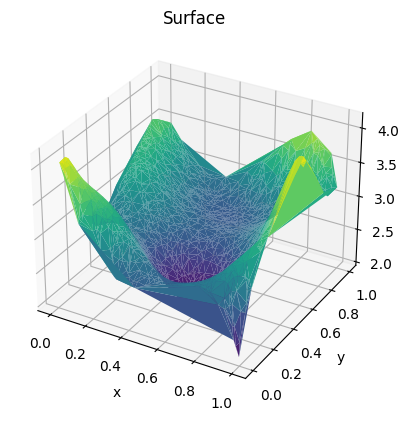

In [88]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_trisurf(x_train[:, 0], x_train[:, 1], y_train, vmin=y_train.min(), cmap=cm.viridis)


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Surface')

plt.show()


In the following, we give an example of how to train a model. When you train yours, do not forget to validate it ! Hint: it is not enough to look at the training error. The hyperparameter values have voluntarily be set to give suboptimal results, you can do better than the proposed architecture !

In [1]:
net = keras.Sequential(
        [
            keras.layers.Input(shape= [x_train.shape[1]]),
            keras.layers.Dense(units= 20, activation='sigmoid'),
            # keras.layers.Dense(units= 20, activation='sigmoid'),
            keras.layers.Dense(units= 1)
        ]
    )

net.compile(
    loss = keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.Adam(learning_rate= 0.05)
)

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
history = net.fit(x_train, y_train, validation_split= 0.2, epochs= 500, batch_size= 128, callbacks= [callback], verbose= 0)

plt.figure()
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.plot(history.history['loss'], color= "firebrick", label='loss')
plt.plot(history.history['val_loss'], color= 'teal', label='val_loss')
plt.legend(loc='best')
plt.show()
print('Last training error:', history.history['loss'][-1])
print('Last validation error:', history.history['val_loss'][-1])

NameError: ignored

Once a model is trained, you can use it to assess the final performance of the model on the test set.

In [116]:
y_pred = net.predict(x_test)
y_pred_flat = net.predict(x_test).flatten()
print('Final test error:', 0.5*((y_pred_flat - y_test)**2).mean())

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step        
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step        
Final test error: 0.004549369972181339


(1000,)
(1000,)
(1000, 1)
(1000,)


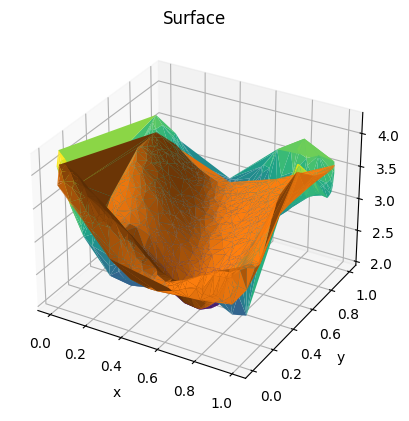

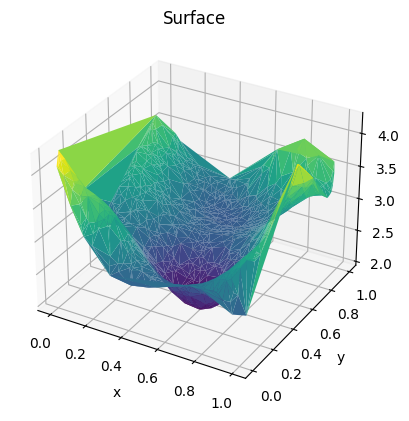

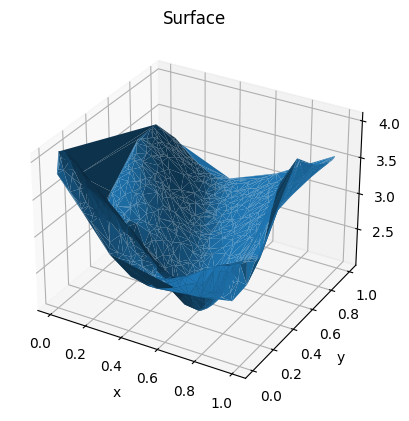

In [117]:

print(x_test[:, 0].shape)
print(x_test[:, 1].shape)
print(y_pred.shape)
print(y_test.shape)

#PLOT TOGETHER
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_trisurf(x_test[:, 0], x_test[:, 1], y_test, vmin=y_train.min(), cmap=cm.viridis)
ax.plot_trisurf(x_test[:, 0], x_test[:, 1], y_pred[:,0], vmin=y_train.min())


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Surface')

plt.show()



#PLOT SEPARATELY
#TEST
fig2, ax2 = plt.subplots(subplot_kw={'projection': '3d'})
ax2.plot_trisurf(x_test[:, 0], x_test[:, 1], y_test, vmin=y_train.min(), cmap=cm.viridis)


ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Surface')
plt.show()


#PRED
fig3, ax3 = plt.subplots(subplot_kw={'projection': '3d'})
ax3.plot_trisurf(x_test[:, 0], x_test[:, 1], y_pred[:,0], vmin=y_train.min())


ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')
ax3.set_title('Surface')
plt.show()